In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("postings.csv")
# Dropping Missing Values
df = df.dropna(subset=['description']).reset_index(drop=True)
df = df.dropna(subset=['currency']).reset_index(drop=True)
df = df.dropna(subset=['compensation_type']).reset_index(drop=True)

# Only consider USD
df = df[df['currency'] == 'USD'].reset_index(drop=True)

# Get unique values in 'currency' and 'compensation_type' columns
unique_currency = df['currency'].unique()
unique_compensation_type = df['compensation_type'].unique()

# Print the unique values
print("Unique currencies:", unique_currency)
print("Unique compensation types:", unique_compensation_type)


Unique currencies: ['USD']
Unique compensation types: ['BASE_SALARY']


# EDA

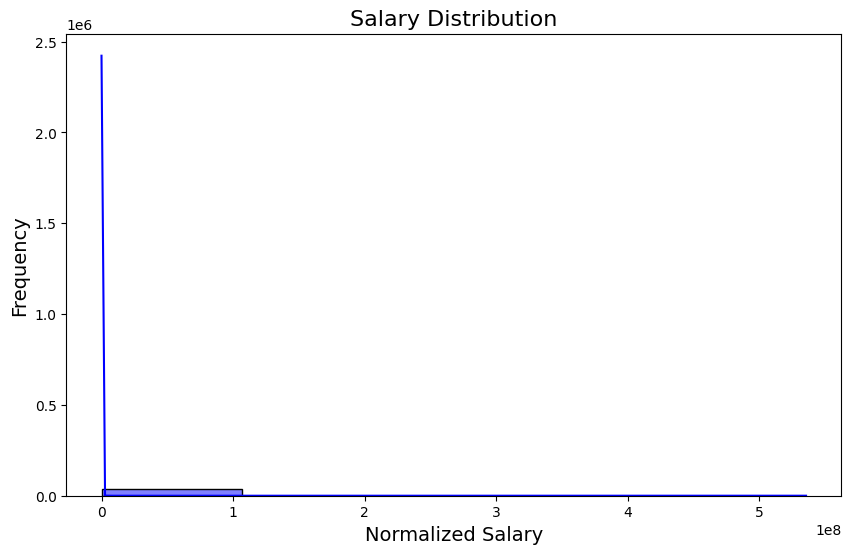

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36052,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
36053,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
36054,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
36055,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


In [5]:
plt.figure(figsize=(10, 6))
# Use seaborn to create a histogram
sns.histplot(df['normalized_salary'], bins=5, kde=True, color='blue')
    
# Add titles and labels
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Normalized Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
    
# Show the plot
plt.show()
df


In [6]:
Q1 = df['normalized_salary'].quantile(0.25)
Q3 = df['normalized_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only non-outliers
df_no_outliers = df[(df['normalized_salary'] >= lower_bound) & (df['normalized_salary'] <= upper_bound)]

print(f"Original size: {df.shape[0]} rows")
print(f"Size after removing outliers: {df_no_outliers.shape[0]} rows")

Original size: 36057 rows
Size after removing outliers: 35105 rows


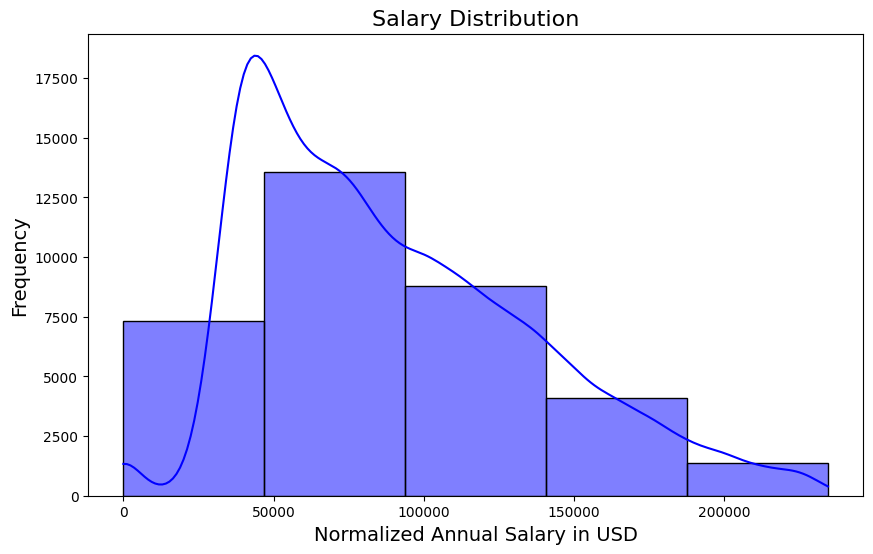

In [7]:
plt.figure(figsize=(10, 6))
# Use seaborn to create a histogram
sns.histplot(df_no_outliers['normalized_salary'], bins=5, kde=True, color='blue')
    
# Add titles and labels
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Normalized Annual Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
    
# Show the plot
plt.show()

In [8]:

# Import necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banhm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banhm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banhm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
df_no_outliers.loc[:, 'description'] = df_no_outliers['description'].fillna('')  # Handle missing data
df_no_outliers.loc[:, 'description'] = df_no_outliers['description'].astype(str)  # Ensure the column is of type string

# Feature Engineering

In [10]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords & lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the description column efficiently
df_no_outliers.loc[:, 'description'] = df_no_outliers['description'].apply(preprocess_text)

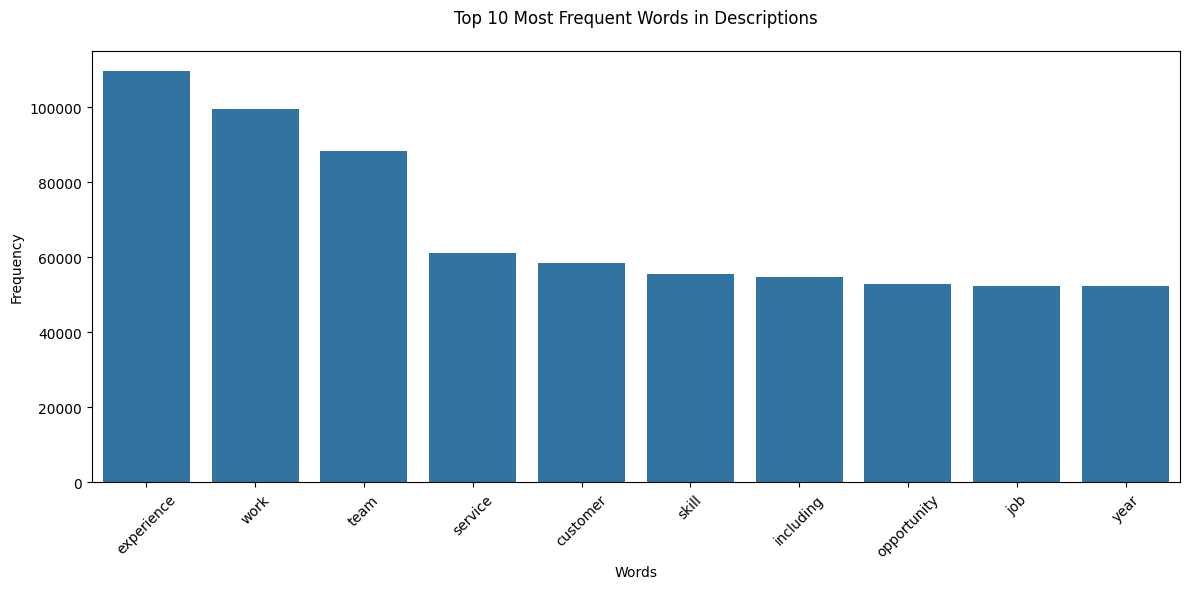


Word Frequencies:
experience: 109540
work: 99597
team: 88317
service: 61262
customer: 58540
skill: 55457
including: 54827
opportunity: 52968
job: 52451
year: 52392


In [9]:
from collections import Counter
# Split all descriptions into words and count frequencies
all_words = ' '.join(df_no_outliers['description']).split()
word_freq = Counter(all_words)

# Get the top 10 most frequent words
top_10_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_words.keys()), y=list(top_10_words.values()))

# Customize the plot
plt.title('Top 10 Most Frequent Words in Descriptions', pad=20)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Print the actual frequencies
print("\nWord Frequencies:")
for word, freq in top_10_words.items():
    print(f"{word}: {freq}")

In [11]:
# sort noramlized_salary into three buckets: low, median, high
def categorize_salary(salary):
    if salary <= 50000:
        return 'low'
    elif salary <= 150000:
        return 'median'
    else:
        return 'high'

df_no_outliers.loc[:,'salary_bracket'] = df_no_outliers['normalized_salary'].apply(categorize_salary)
# Verify the distribution
print("\nSalary Bracket Distribution:")
print(df_no_outliers['salary_bracket'].value_counts())


Salary Bracket Distribution:
salary_bracket
median    22261
low        8580
high       4264
Name: count, dtype: int64


C:\Users\banhm\AppData\Local\Temp\ipykernel_24300\3006450295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:,'salary_bracket'] = df_no_outliers['normalized_salary'].apply(categorize_salary)


# Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Split the data
X = df_no_outliers['description']
y = df_no_outliers['salary_bracket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create pipeline with Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get feature importance
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
importances = pipeline.named_steps['classifier'].feature_importances_

# Get top important features overall
n_top_features = 20
top_indices = np.argsort(importances)[-n_top_features:]
top_features = [(feature_names[i], importances[i]) for i in top_indices]

print(f"\nTop {n_top_features} most important words for salary prediction:")
for feature, importance in reversed(top_features):
    print(f"{feature}: {importance:.4f}")

# Print sample predictions with probabilities
print("\nSample Predictions with Probabilities:")
probabilities = pipeline.predict_proba(X_test[:5])
for text, true_label, pred_label, probs in zip(X_test[:5], y_test[:5], y_pred[:5], probabilities):
    print(f"\nText snippet: {text[:100]}...")
    print(f"True label: {true_label}")
    print(f"Predicted label: {pred_label}")
    print("Class probabilities:")
    for class_label, prob in zip(pipeline.named_steps['classifier'].classes_, probs):
        print(f"  {class_label}: {prob:.4f}")

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Get a single tree from the random forest
tree = pipeline.named_steps['classifier'].estimators_[0]

# Get feature names from TF-IDF
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

# Export the tree to dot format
dot_data = export_graphviz(
    tree,
    feature_names=feature_names, 
    class_names=list(pipeline.named_steps['classifier'].classes_),
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # Limit depth to make visualization manageable
)

# Create graph
graph = graphviz.Source(dot_data)

# Display the tree
graph.render("decision_tree_visualization", format="png", cleanup=True)

print("Decision tree has been saved as 'decision_tree_visualization.png'")

# If you want to see a text representation of the tree rules
from sklearn.tree import export_text

# Print text representation
print("\nText representation of the decision tree:")
print(export_text(tree, feature_names=list(feature_names), max_depth=3))

In [14]:
# Train and save a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np

# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', LogisticRegression(random_state=42))
])

# Train Logistic Regression model
logreg_pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(logreg_pipeline, 'logistic_regression_pipeline.joblib')

['logistic_regression_pipeline.joblib']


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.35      0.47       835
         low       0.82      0.71      0.76      1662
      median       0.80      0.92      0.86      4524

    accuracy                           0.80      7021
   macro avg       0.78      0.66      0.70      7021
weighted avg       0.80      0.80      0.79      7021



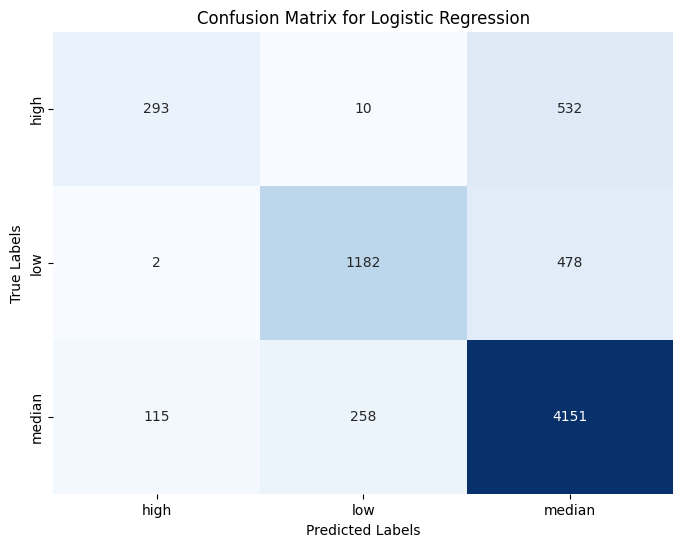

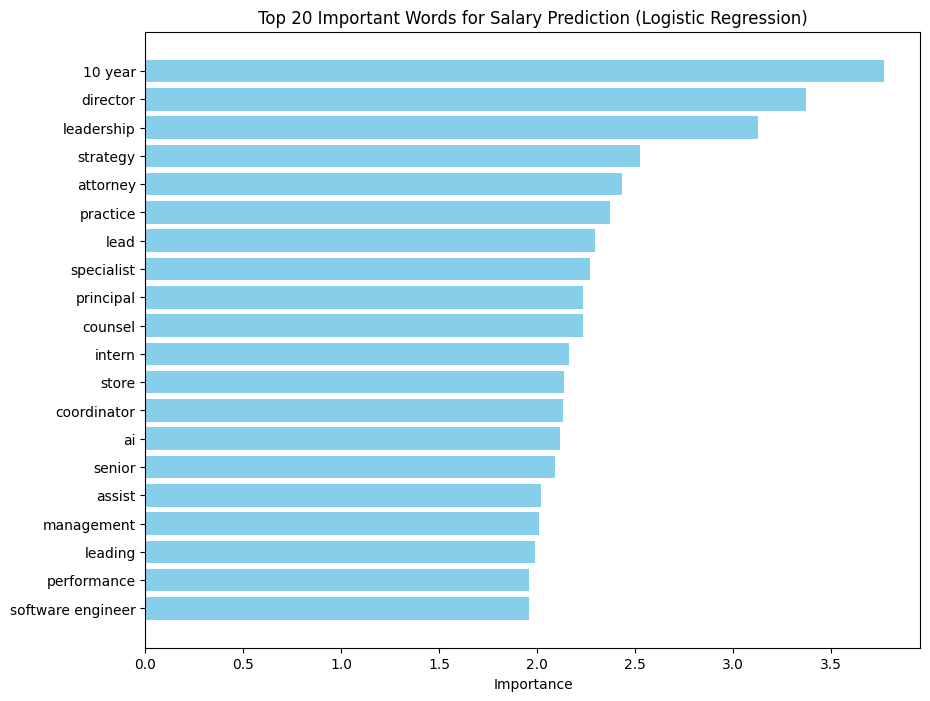


Sample Predictions with Probabilities (Logistic Regression):

Text snippet: life capgeminicapgemini support aspect wellbeing throughout changing stage life career eligible empl...
True label: median
Predicted label: median
Class probabilities:
  high: 0.2622
  low: 0.0209
  median: 0.7169

Text snippet: job number r0195800 data governance standard specialist opportunity data governance specialist love ...
True label: median
Predicted label: median
Class probabilities:
  high: 0.1357
  low: 0.0749
  median: 0.7894

Text snippet: departmentoperations strategy design company promise committed provide employee stable work environm...
True label: median
Predicted label: median
Class probabilities:
  high: 0.3290
  low: 0.0090
  median: 0.6620

Text snippet: job title procurement support specialistpart timelocation hoffman estate il 60192duration 12 month p...
True label: median
Predicted label: median
Class probabilities:
  high: 0.0052
  low: 0.2465
  median: 0.7483

Text snippet: account

In [17]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained model
logreg_pipeline = joblib.load('logistic_regression_pipeline.joblib')

# Logistic Regression Predictions
logreg_y_pred = logreg_pipeline.predict(X_test)

# Print Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, logreg_y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logreg_pipeline.named_steps['classifier'].classes_,
            yticklabels=logreg_pipeline.named_steps['classifier'].classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Logistic Regression Feature Importances (using coefficients)
feature_names = logreg_pipeline.named_steps['tfidf'].get_feature_names_out()
logreg_importances = np.abs(logreg_pipeline.named_steps['classifier'].coef_[0])  # Absolute values of coefficients

# Top important features for Logistic Regression
n_top_features = 20
top_indices = np.argsort(logreg_importances)[-n_top_features:]
top_features = [(feature_names[i], logreg_importances[i]) for i in top_indices]

# Plot Feature Importances
top_features_sorted = sorted(top_features, key=lambda x: x[1], reverse=True)
words, importances = zip(*top_features_sorted)

plt.figure(figsize=(10, 8))
plt.barh(words, importances, color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {n_top_features} Important Words for Salary Prediction (Logistic Regression)')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# Sample Predictions with Probabilities
print("\nSample Predictions with Probabilities (Logistic Regression):")
logreg_probabilities = logreg_pipeline.predict_proba(X_test[:5])
for text, true_label, pred_label, probs in zip(X_test[:5], y_test[:5], logreg_y_pred[:5], logreg_probabilities):
    print(f"\nText snippet: {text[:100]}...")
    print(f"True label: {true_label}")
    print(f"Predicted label: {pred_label}")
    print("Class probabilities:")
    for class_label, prob in zip(logreg_pipeline.named_steps['classifier'].classes_, probs):
        print(f"  {class_label}: {prob:.4f}")


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import joblib

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train Gradient Boosting model
gb_pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(gb_pipeline, 'gradient_boosting_pipeline.joblib')


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        high       0.76      0.24      0.36       835
         low       0.82      0.61      0.70      1662
      median       0.77      0.94      0.84      4524

    accuracy                           0.78      7021
   macro avg       0.78      0.59      0.63      7021
weighted avg       0.78      0.78      0.75      7021



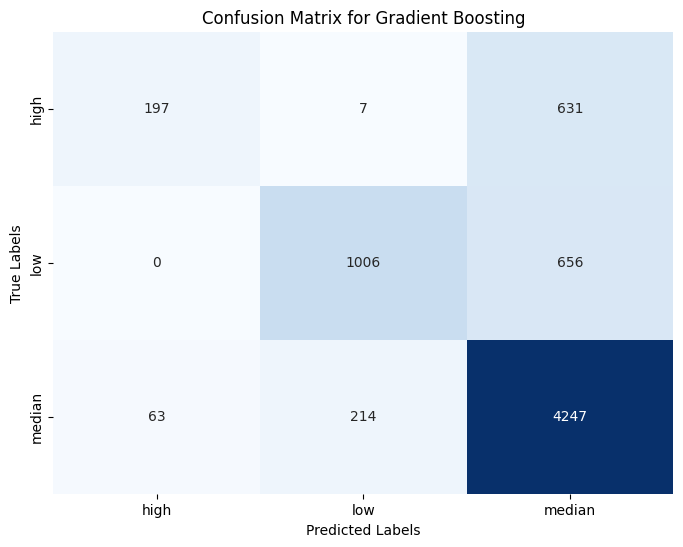

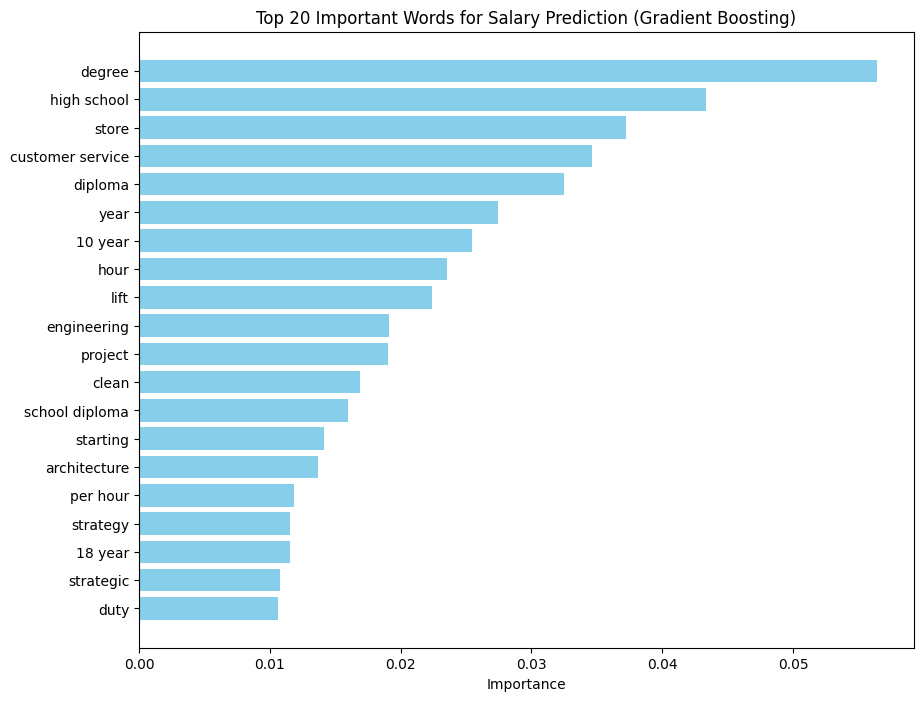


Sample Predictions with Probabilities (Gradient Boosting):

Text snippet: life capgeminicapgemini support aspect wellbeing throughout changing stage life career eligible empl...
True label: median
Predicted label: median
Class probabilities:
  high: 0.3409
  low: 0.0830
  median: 0.5761

Text snippet: job number r0195800 data governance standard specialist opportunity data governance specialist love ...
True label: median
Predicted label: median
Class probabilities:
  high: 0.1313
  low: 0.0661
  median: 0.8026

Text snippet: departmentoperations strategy design company promise committed provide employee stable work environm...
True label: median
Predicted label: high
Class probabilities:
  high: 0.4626
  low: 0.1215
  median: 0.4160

Text snippet: job title procurement support specialistpart timelocation hoffman estate il 60192duration 12 month p...
True label: median
Predicted label: low
Class probabilities:
  high: 0.0250
  low: 0.4886
  median: 0.4864

Text snippet: account payabl

In [18]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained Gradient Boosting model
gb_pipeline = joblib.load('gradient_boosting_pipeline.joblib')

# Gradient Boosting Predictions
gb_y_pred = gb_pipeline.predict(X_test)

# Print Classification Report
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, gb_y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=gb_pipeline.named_steps['classifier'].classes_,
            yticklabels=gb_pipeline.named_steps['classifier'].classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# Get feature importances for Gradient Boosting
feature_names = gb_pipeline.named_steps['tfidf'].get_feature_names_out()
gb_importances = gb_pipeline.named_steps['classifier'].feature_importances_

# Top important features for Gradient Boosting
n_top_features = 20
top_indices = np.argsort(gb_importances)[-n_top_features:]
top_features = [(feature_names[i], gb_importances[i]) for i in top_indices]

# Plot Feature Importances
top_features_sorted = sorted(top_features, key=lambda x: x[1], reverse=True)
words, importances = zip(*top_features_sorted)

plt.figure(figsize=(10, 8))
plt.barh(words, importances, color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {n_top_features} Important Words for Salary Prediction (Gradient Boosting)')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# Sample Predictions with Probabilities
print("\nSample Predictions with Probabilities (Gradient Boosting):")
gb_probabilities = gb_pipeline.predict_proba(X_test[:5])
for text, true_label, pred_label, probs in zip(X_test[:5], y_test[:5], gb_y_pred[:5], gb_probabilities):
    print(f"\nText snippet: {text[:100]}...")
    print(f"True label: {true_label}")
    print(f"Predicted label: {pred_label}")
    print("Class probabilities:")
    for class_label, prob in zip(gb_pipeline.named_steps['classifier'].classes_, probs):
        print(f"  {class_label}: {prob:.4f}")
